In [2]:
%load_ext autoreload
%autoreload 2
from board import *
from candy import *
from analysis import *
import matplotlib.pyplot as plt
import pandas as pd
from viz import Viz

pygame 2.6.1 (SDL 2.28.4, Python 3.9.6)
Hello from the pygame community. https://www.pygame.org/contribute.html
Using device: cpu


In [25]:
df = pd.read_csv('results_backup/results_arena.csv')

In [30]:
df.mean()

random              2532.1
mcts_base           8062.5
mcts_fixed_depth    6997.3
offline             2247.1
combined            7330.5
dtype: float64

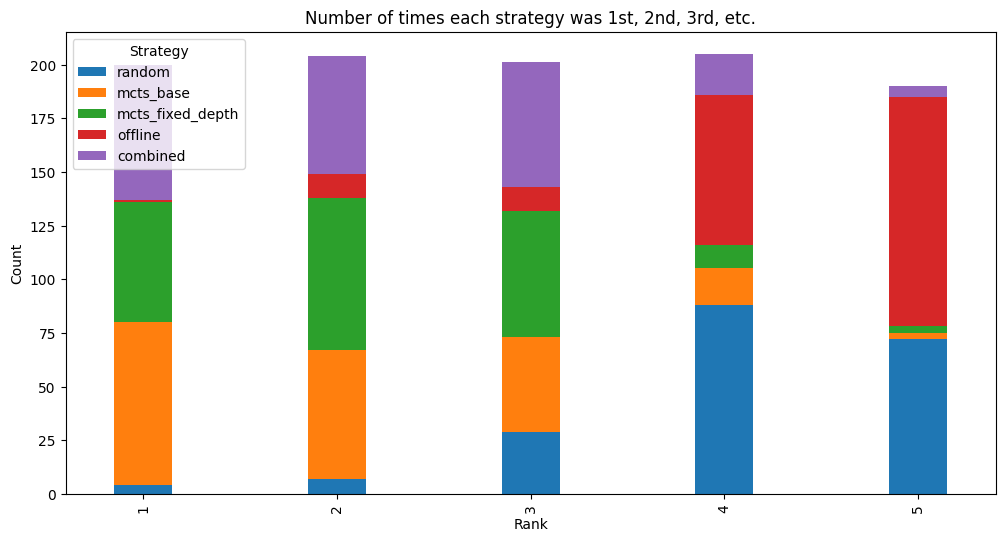

In [12]:

# Rank each row
ranks = df.rank(axis=1, method='min', ascending=False)

# Count the number of times each strategy was 1st, 2nd, 3rd, etc.
rank_counts = pd.DataFrame(0, index=df.columns, columns=range(1, len(df.columns) + 1))
for col in ranks.columns:
    rank_counts.loc[col] = ranks[col].value_counts().reindex(range(1, len(df.columns) + 1), fill_value=0)

# Plot stacked bar plot
rank_counts.T.plot(kind='bar', stacked=True, figsize=(12, 6), width=0.3)
plt.xlabel('Rank')
plt.ylabel('Count')
plt.title('Number of times each strategy was 1st, 2nd, 3rd, etc.')
plt.legend(title='Strategy')
plt.show()

In [21]:
ranks

,random,mcts_base,mcts_fixed_depth,offline,combined
0,4.0,1.0,3.0,5.0,2.0
1,4.0,2.0,1.0,5.0,3.0
2,4.0,2.0,3.0,4.0,1.0
3,5.0,3.0,1.0,4.0,2.0
4,4.0,1.0,3.0,4.0,2.0
...,...,...,...,...,...
195,4.0,2.0,3.0,5.0,1.0
196,5.0,1.0,4.0,2.0,3.0
197,4.0,2.0,3.0,5.0,1.0
198,4.0,1.0,2.0,5.0,3.0


/var/folders/n7/7ln3k6zx5hj40n1dc441clm40000gn/T/ipykernel_74880/1436757019.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  rank_counts.plot(kind='bar', stacked=True, figsize=(12, 6), colormap=cm.get_cmap('Blues_r'))


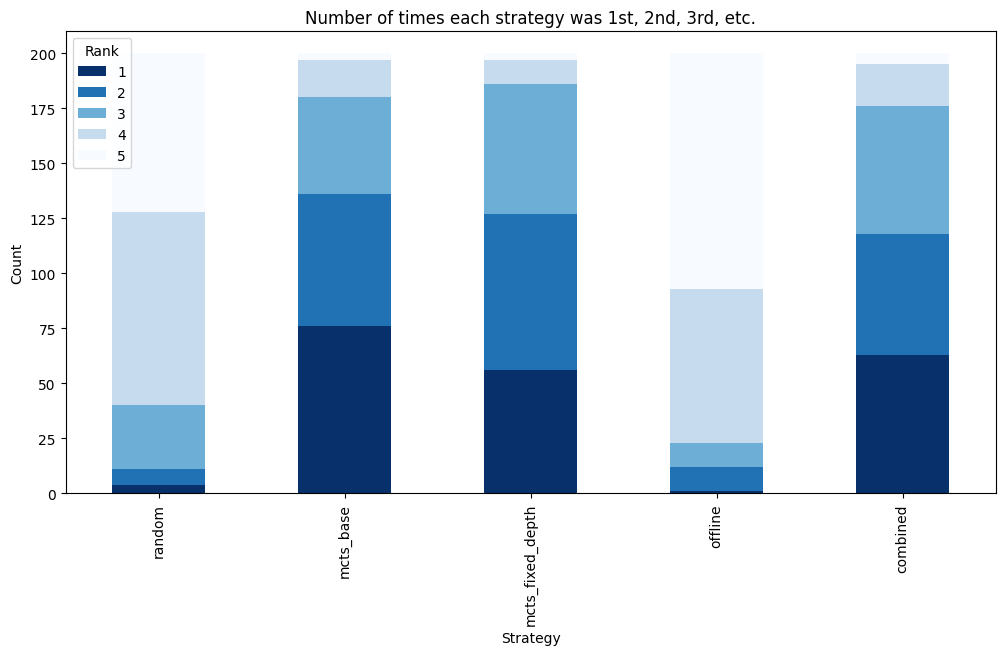

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm


# Rank each row
ranks = df.rank(axis=1, method='min', ascending=False)

# Count the number of times each strategy was 1st, 2nd, 3rd, etc.
rank_counts = pd.DataFrame(0, index=df.columns, columns=range(1, len(df.columns) + 1))
for col in ranks.columns:
    rank_counts.loc[col] = ranks[col].value_counts().reindex(range(1, len(df.columns) + 1), fill_value=0)

# Plot stacked bar plot with strategies on the x-axis using a colormap
rank_counts.plot(kind='bar', stacked=True, figsize=(12, 6), colormap=cm.get_cmap('Blues_r'))
plt.xlabel('Strategy')
plt.ylabel('Count')
plt.title('Number of times each strategy was 1st, 2nd, 3rd, etc.')
plt.legend(title='Rank')
plt.show()

In [41]:
wins = []
for idx in df.index:
    winner = None
    best_score = 0
    for col in df.columns:
        score = df.iloc[idx][col]
        if score > best_score:
            best_score = score
            winner = col
    wins.append(winner)    

In [42]:
for col in df.columns:  
    print(col, wins.count(col))

random 4
mcts_base 76
mcts_fixed_depth 56
offline 1
combined 63


In [43]:
for col in df.columns:  
    print(col, wins.count(col))

random 4
mcts_base 76
mcts_fixed_depth 56
offline 1
combined 63


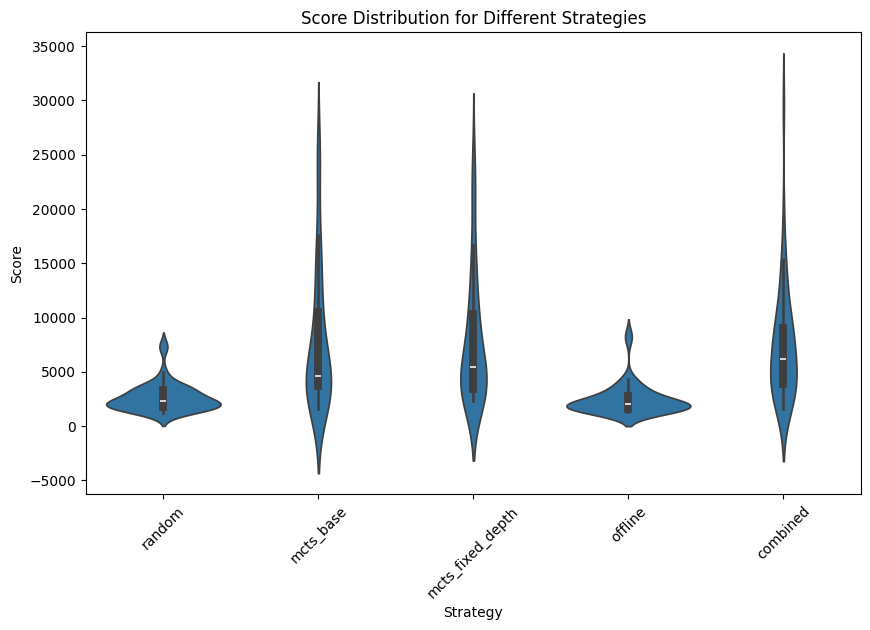

In [8]:

# Melt the DataFrame to long format
df_melted = df.melt(var_name='Strategy', value_name='Score')

# Create a violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='Strategy', y='Score', data=df_melted)
plt.title('Score Distribution for Different Strategies')
plt.xlabel('Strategy')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.show()

/Users/alexisbonnafont/Library/Python/3.9/lib/python/site-packages/seaborn/categorical.py:3399: UserWarning: 47.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/alexisbonnafont/Library/Python/3.9/lib/python/site-packages/seaborn/categorical.py:3399: UserWarning: 54.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/alexisbonnafont/Library/Python/3.9/lib/python/site-packages/seaborn/categorical.py:3399: UserWarning: 50.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/alexisbonnafont/Library/Python/3.9/lib/python/site-packages/seaborn/categorical.py:3399: UserWarning: 8.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/al

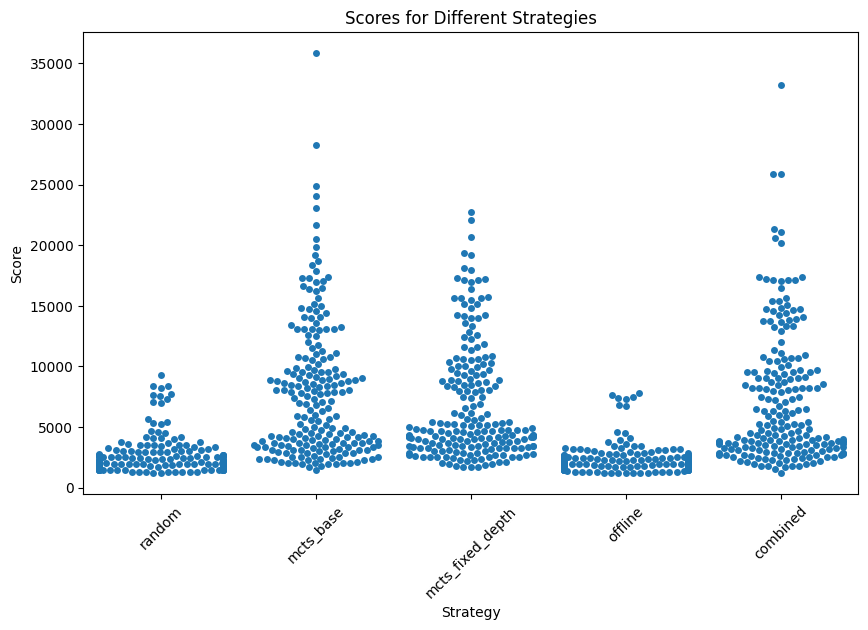

In [18]:

# Melt the DataFrame to long format
df_melted = df.melt(var_name='Strategy', value_name='Score')

# Create a swarm plot
plt.figure(figsize=(10, 6))
sns.swarmplot(x='Strategy', y='Score', data=df_melted)
plt.title('Scores for Different Strategies')
plt.xlabel('Strategy')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.show()

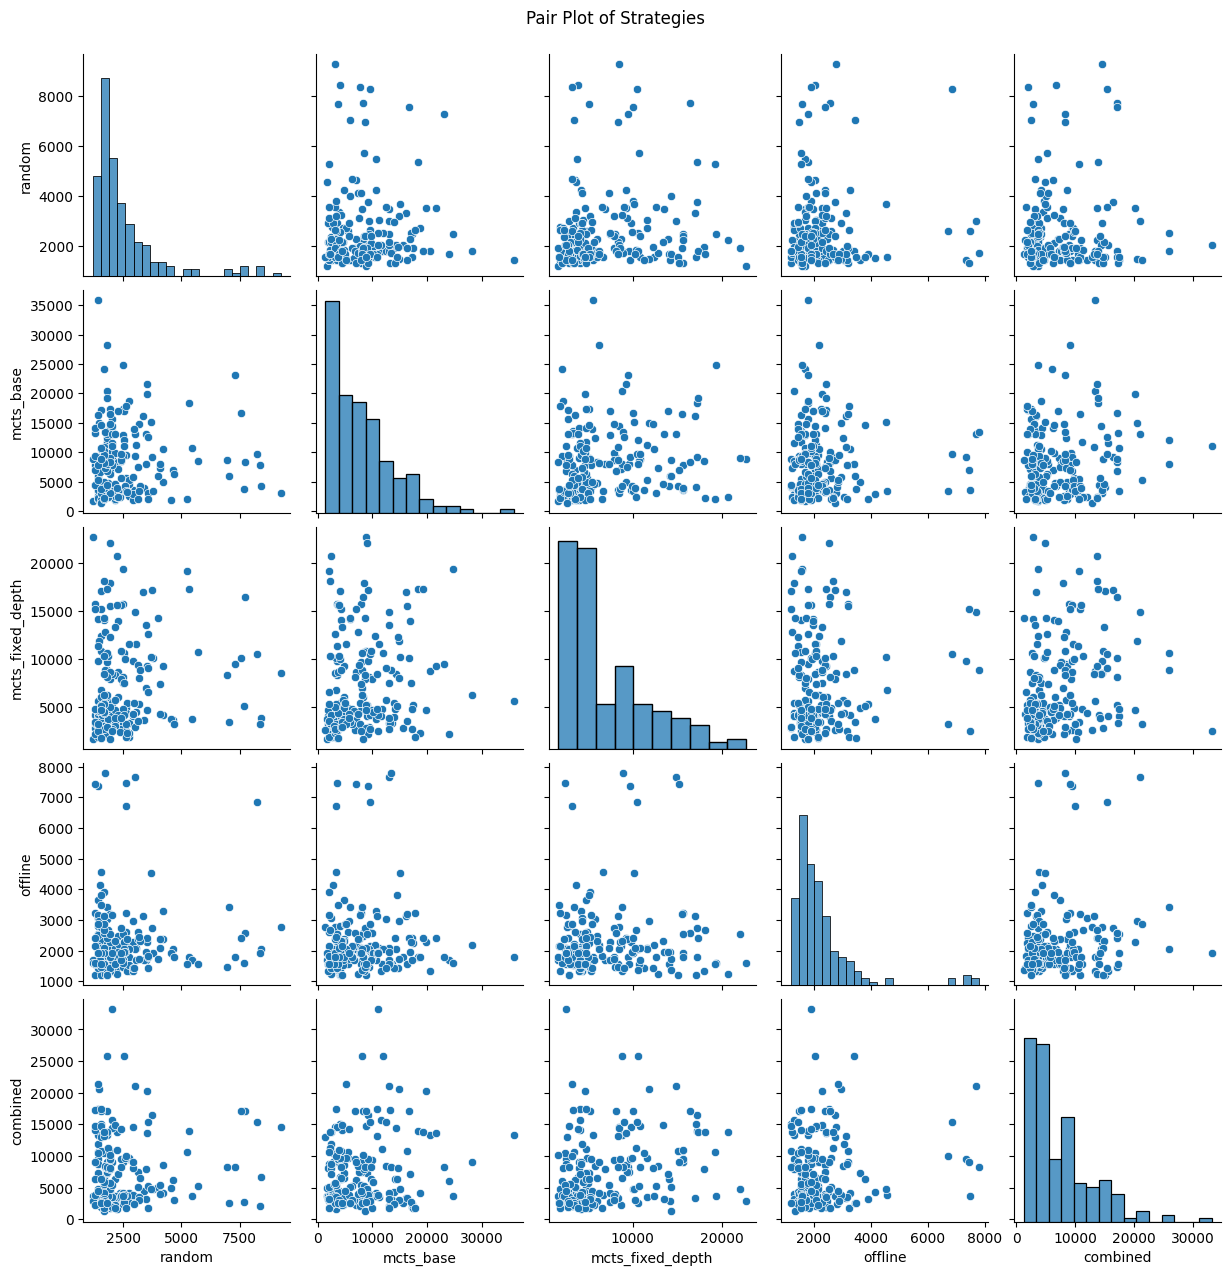

In [22]:
# Create a pair plot
sns.pairplot(df)
plt.suptitle('Pair Plot of Strategies', y=1.02)
plt.show()

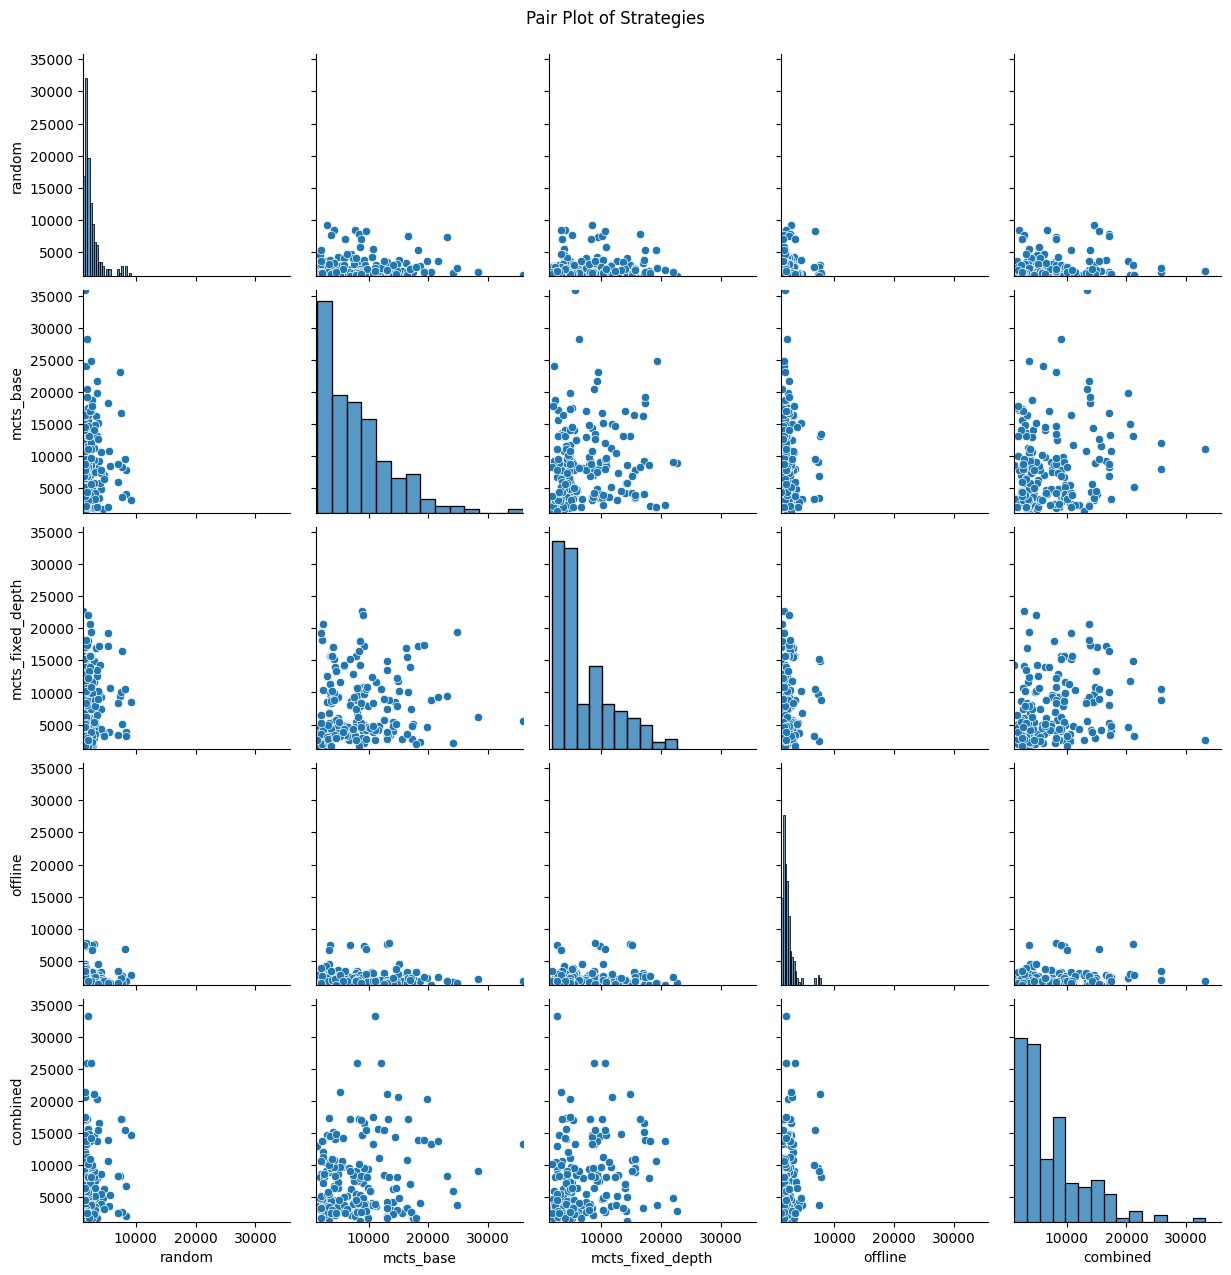

In [23]:

pairplot = sns.pairplot(df)

# Set the same xlim and ylim for all subplots
xlim = (df.min().min(), df.max().max())
ylim = (df.min().min(), df.max().max())

for ax in pairplot.axes.flatten():
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

plt.suptitle('Pair Plot of Strategies', y=1.02)
plt.show()